In [ ]:
# Start writing code here...
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli

In [ ]:
N = 10  # number of nodes
k = 1.5  # average connections per node
p = k / N
adj_matrix = bernoulli.rvs(p=0.15, size=(N,N))
adj_matrix

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

<AxesSubplot:>

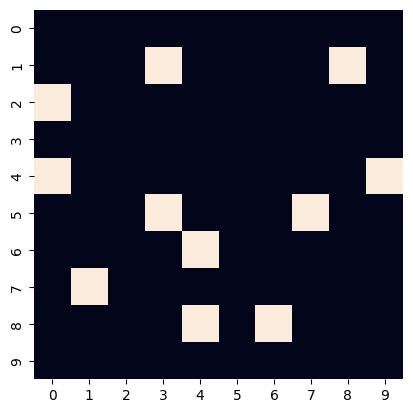

In [ ]:
np.fill_diagonal(adj_matrix, 0)
sns.heatmap(adj_matrix, cbar=False, square=True)

In [ ]:
# Adjacency list
adj_list = {ni: np.where(adj_matrix[ni])[0] for ni in range(N)}
adj_list

{0: array([], dtype=int64),
 1: array([3, 8]),
 2: array([0]),
 3: array([], dtype=int64),
 4: array([0, 9]),
 5: array([3, 7]),
 6: array([4]),
 7: array([1]),
 8: array([4, 6]),
 9: array([], dtype=int64)}

In [ ]:
# Edges list
edge_list = [(ni, neighbor) for ni in range(N) for neighbor in adj_list[ni]]
edge_list

[(1, 3),
 (1, 8),
 (2, 0),
 (4, 0),
 (4, 9),
 (5, 3),
 (5, 7),
 (6, 4),
 (7, 1),
 (8, 4),
 (8, 6)]

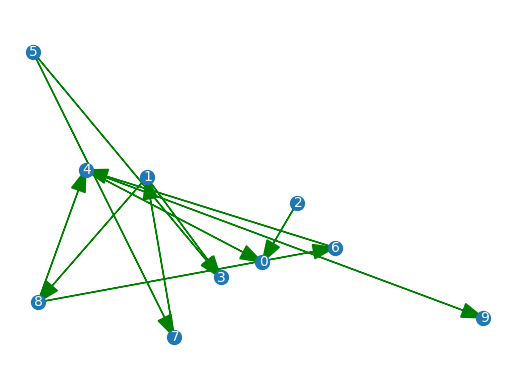

In [ ]:
def draw_arc(a, b, hw = 0.06):
    # Connects points a and b with an arrow: a-->b
    plt.arrow(a[0], a[1], b[0] - a[0], b[1] - a[1], 
              head_width = hw, length_includes_head = True, color="green"
              )


              
a, b = -1, 1
x = np.random.random(size=N)*(b-a) + a
y = np.random.random(size=N)*(b-a) + a

plt.plot(x, y, '.', ms=20)
plt.axis('off')
plt.axis('equal')

e = [draw_arc([x[edge[0]], y[edge[0]]], [x[edge[1]], y[edge[1]]]) for edge in edge_list]
offset = 0.015
t = [plt.text(x[ni]-offset, y[ni]-offset, str(ni), color='w') for ni in range(N)]

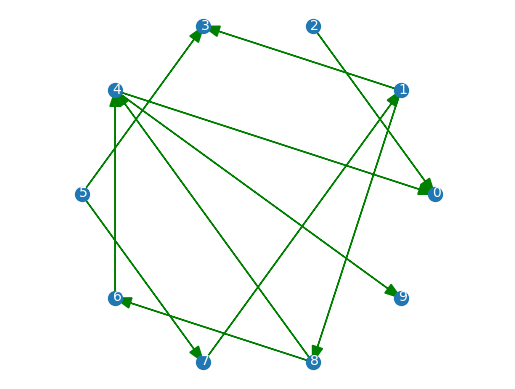

In [ ]:
x = np.cos(np.linspace(0, 2*np.pi, N, endpoint=False))
y = np.sin(np.linspace(0, 2*np.pi, N, endpoint=False))

plt.plot(x, y, '.', ms=20)
plt.axis('off')
plt.axis('equal')

e = [draw_arc([x[edge[0]], y[edge[0]]], [x[edge[1]], y[edge[1]]]) for edge in edge_list]
offset = 0.015
t = [plt.text(x[ni]-offset, y[ni]-offset, str(ni), color='w') for ni in range(N)]

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Polar_to_cartesian.svg/1024px-Polar_to_cartesian.svg.png)

In [ ]:
x = np.cos(np.linspace(0, 2*np.pi, N, endpoint=False))
y = np.sin(np.linspace(0, 2*np.pi, N, endpoint=False))

In [ ]:
N = 10
k = 2
C = []
for ni in range(N):
    C += [[]]
    for ki in range(k//2):
        C[ni] += [ni-(ki+1), ni+(ki+1)]
C = np.array(C)
C[np.where(C < 0)] += N
C[np.where(C >= N)] -= N
C

array([[9, 1],
       [0, 2],
       [1, 3],
       [2, 4],
       [3, 5],
       [4, 6],
       [5, 7],
       [6, 8],
       [7, 9],
       [8, 0]])

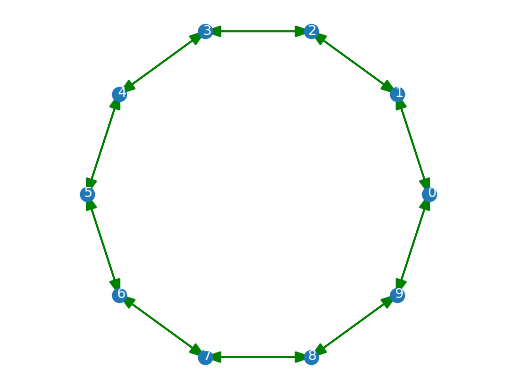

In [ ]:
edge_list =  [(ni, neighbor) for ni in range(N) for neighbor in C[ni]]

x = np.cos(np.linspace(0, 2*np.pi, N, endpoint=False))
y = np.sin(np.linspace(0, 2*np.pi, N, endpoint=False))

plt.plot(x, y, '.', ms=20)
plt.axis('off')
plt.axis('equal')

e = [draw_arc([x[edge[0]], y[edge[0]]], [x[edge[1]], y[edge[1]]]) for edge in edge_list]
offset = 0.015
t = [plt.text(x[ni]-offset, y[ni]-offset, str(ni), color='w') for ni in range(N)]

<AxesSubplot:>

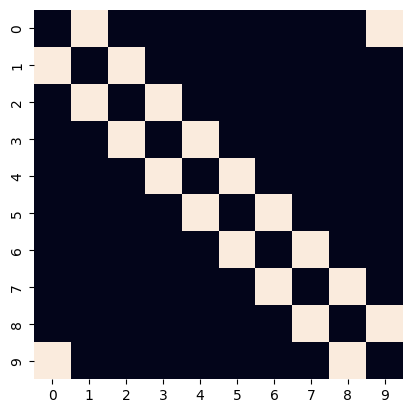

In [ ]:
adj_matrix = np.zeros((N,N))
for row in range(N):
    for col in C[row]:
        adj_matrix[row, col] = 1

sns.heatmap(adj_matrix, cbar=False, square=True)

In [ ]:
omega = 0.1 # omega: probabilidad de recableado
ni = 0 
all_nodes = set(range(N))
C[ni], all_nodes - set(list(C[ni])+[ni])
available_nodes = list(all_nodes - set(list(C[ni])+[ni]))
C[ni], all_nodes, available_nodes, np.random.choice(available_nodes)

(array([9, 1]), {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, [2, 3, 4, 5, 6, 7, 8], 4)

In [ ]:
R = C.copy()
for ni in range(N):
    for j, nj in enumerate(C[ni]):
        if np.random.random() < omega:
            available_nodes = list(all_nodes - set(list(C[ni])+[ni]))
            C[ni, j] = np.random.choice(available_nodes)
C

array([[9, 1],
       [0, 2],
       [1, 3],
       [2, 4],
       [3, 5],
       [9, 6],
       [5, 7],
       [5, 8],
       [7, 9],
       [8, 0]])

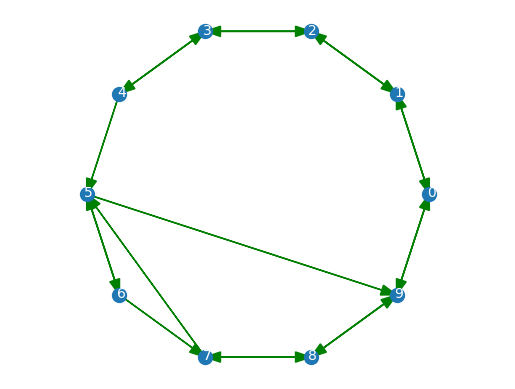

In [ ]:
edge_list =  [(ni, neighbor) for ni in range(N) for neighbor in C[ni]]

x = np.cos(np.linspace(0, 2*np.pi, N, endpoint=False))
y = np.sin(np.linspace(0, 2*np.pi, N, endpoint=False))

plt.plot(figsize=(500,500))
plt.plot(x, y, '.', ms=20)
plt.axis('off')
plt.axis('equal')

e = [draw_arc([x[edge[0]], y[edge[0]]], [x[edge[1]], y[edge[1]]]) for edge in edge_list]
offset = 0.015
t = [plt.text(x[ni]-offset, y[ni]-offset, str(ni), color='w') for ni in range(N)]

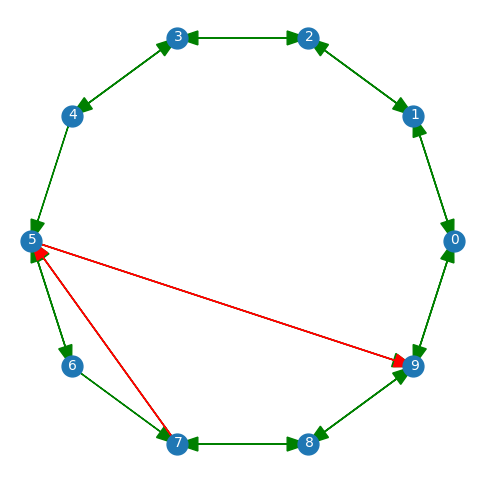

In [ ]:
def draw_edge(a, b, ni, nj, hw=0, color='green'):
    # Connects points a and b with an arrow: a-->b
    plt.arrow(a[0], a[1], b[0] - a[0], b[1] - a[1], 
              head_width = hw, length_includes_head = True, color=color
              )
              
def plot_circular_layout(adj_list, hw=0.0, rewired_arcs=None):

    t = np.linspace(0, 2*np.pi, N, endpoint=False)

    x = np.cos(t)
    y = np.sin(t)

    plt.figure(figsize=(6,6))
    plt.plot(x, y, '.', ms=30)
    plt.axis('off')
    for i in range(N):
        plt.text(x[i]-0.015, y[i]-0.015, i, c='w')
    e = [draw_edge([x[a], y[a]], [x[b], y[b]], a, b, hw) 
         for a in adj_list for b in adj_list[a] if len(adj_list[a])]
    
    if rewired_arcs is not None:
        e = [draw_edge([x[a], y[a]], [x[b], y[b]], a, b, 0.06, color="red") 
         for a in rewired_arcs for b in rewired_arcs[a] if len(rewired_arcs[a])]

rewired_arcs = {i: list(set(C[i])-set(R[i])) for i in range(N)}
adj_list = {node: neighbors for node, neighbors in enumerate(C)}
plot_circular_layout(adj_list, hw=0.065, rewired_arcs=rewired_arcs)

In [ ]:
W = np.array([bernoulli.rvs(p=0.5, size=len(C[ni]))*2-1 for ni in range(N)])
W

array([[ 1,  1],
       [ 1,  1],
       [ 1,  1],
       [ 1, -1],
       [ 1, -1],
       [ 1,  1],
       [-1, -1],
       [ 1, -1],
       [-1, -1],
       [ 1,  1]])

In [ ]:
states = bernoulli.rvs(p=0.5, size=N)
states

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [ ]:
ni = 0
C[ni], W[ni], states[C[ni]], (W[ni]*states[C[ni]]).sum()

(array([9, 1]), array([1, 1]), array([1, 0]), 1)

In [ ]:
[(W[ni]*states[C[ni]]).sum() for ni in range(N)]

[1, 1, 1, -1, 1, 1, 0, 0, -1, 1]

In [ ]:
np.array([(W[ni]*states[C[ni]]).sum()>=0 for ni in range(N)])*1

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [ ]:
activity = []
time = 10
for ti in range(time):
    states = np.array([(W[ni]*states[C[ni]]).sum()>=0 for ni in range(N)])*1
    print(states)
    activity += [states.mean()]
states

[1 1 1 0 1 1 1 1 0 1]
[1 1 1 1 0 1 0 1 0 1]
[1 1 1 1 1 1 0 1 0 1]
[1 1 1 1 1 1 0 1 0 1]
[1 1 1 1 1 1 0 1 0 1]
[1 1 1 1 1 1 0 1 0 1]
[1 1 1 1 1 1 0 1 0 1]
[1 1 1 1 1 1 0 1 0 1]
[1 1 1 1 1 1 0 1 0 1]
[1 1 1 1 1 1 0 1 0 1]


array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
activity

[0.8, 0.7, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]

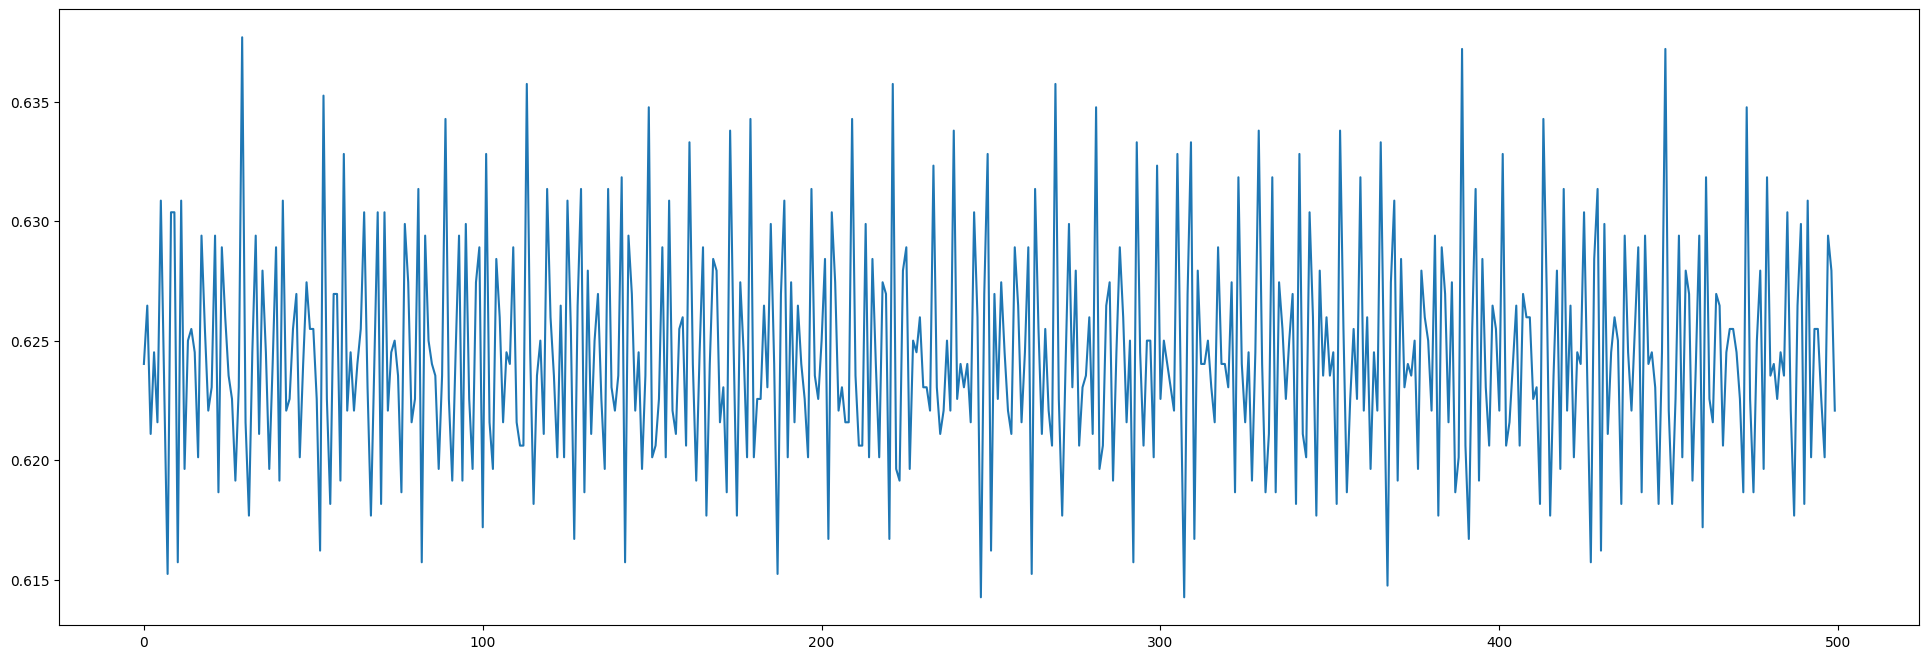

In [ ]:
N = 2048
k = 4
C = []
for ni in range(N):
    C += [[]]
    for ki in range(k//2):
        C[ni] += [ni-(ki+1), ni+(ki+1)]
C = np.array(C)
C[np.where(C < 0)] += N
C[np.where(C >= N)] -= N

W = np.array([bernoulli.rvs(p=0.5, size=len(C[ni]))*2-1 for ni in range(N)])

states = bernoulli.rvs(p=0.5, size=N)

activity = []
time = 10000
for ti in range(time):
    states = np.array([(W[ni]*states[C[ni]]).sum()>=0 for ni in range(N)])*1
    activity += [states.mean()]

plt.figure(figsize=(24,8))
plt.plot(activity[-500:])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cce3455d-da08-4c10-a6fe-39f2a30c6a51' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>